In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

На картинке изображена структурная схема модели, которую планируется реализовать.

Желтым цветом отмечены блоки, функции для которых на данный момент прописаны.

Синим цветом отмечены блоки, над которыми либо ведется работа, либо они просто пропущены (тк не написан другой блок, без которого этот не может обойтись), но будут в финальной модели.

Красным цветом отмечены блоки, которые делать не планируется.

![Структурная схема модели](model_structure.png)

Каждый блок этой диаграммы (или набор блоков) реализован как отдельная функция, преобразующая входной в нее массив.

Основной управляющий файл `ofdm_modem.m` сохраняет данные с выхода каждого блока в txt файл. Поэтому можно смотреть как преобразуется сигнал от блока к блоку.

Просмотр фрейма во временной области и добавление к сигналу гауссовского шума.

In [17]:
info_frame = pd.read_csv('model_290324_CP_ber_evm\\info_frame.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])
info_frame_fd = pd.read_csv('model_290324_CP_ber_evm\\info_frame_fd.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])

NameError: name 'frame_td' is not defined

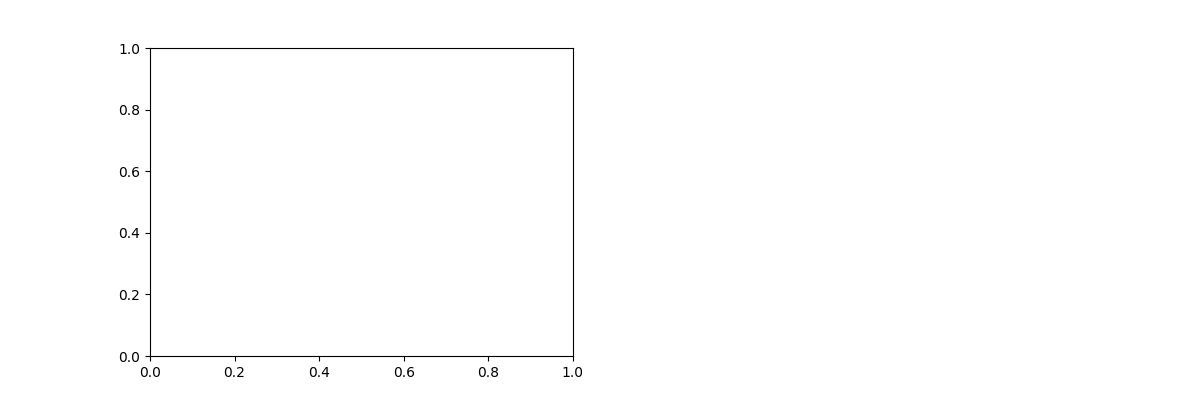

In [18]:
fig1 = plt.figure(figsize=(12,4))
ax_1 = fig1.add_subplot(121)
ax_1.plot(frame_td.index, frame_td['Re'], label='No noise')
ax_1.plot(frame_td_noise.index, frame_td_noise['Re'], label='With Gaussian noise')
ax_1.set_ylabel("s(t)")
ax_1.set_xlabel(r"Frequency")
ax_1.legend()
ax_1.grid()
ax_1.set_title('Real part')
fig1.suptitle('Signal in TD without AWGN')

ax_2 = fig1.add_subplot(122)
ax_2.plot(frame_td.index, frame_td['Im'], label='No noise')
ax_2.plot(frame_td_noise.index, frame_td_noise['Im'], label='With Gaussian noise')
ax_2.set_ylabel("s(t)")
ax_2.set_xlabel(r"Frequency")
ax_2.legend()
ax_2.grid()
ax_2.set_title('Imaginary part')
fig1.suptitle('Signal in TD without AWGN')
plt.show()

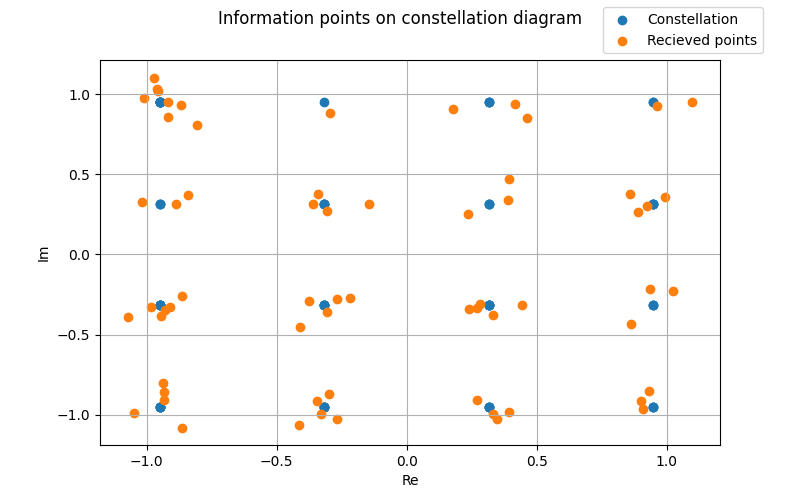

In [19]:
fig2 = plt.figure(figsize=(8,5))
ax_1 = fig2.add_subplot(111)
ax_1.scatter(info_frame['Re'], info_frame['Im'], label='Constellation')
ax_1.scatter(info_frame_fd['Re'], info_frame_fd['Im'], label='Recieved points')
ax_1.set_ylabel("Im")
ax_1.set_xlabel(r"Re")
ax_1.legend(bbox_to_anchor=(0.8, 1))
ax_1.grid()
#ax_1.set_title('Real part')
fig2.suptitle('Information points on constellation diagram')
plt.show()